 ## Reference Point 

In [1]:
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=10,
                       noise=1, random_state=42)

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LinearR = LinearRegression()
LinearR.fit(X_train, y_train)
y_pred = LinearR.predict(X_test)

In [6]:
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

Mean Squared Error:  0.905290217741861


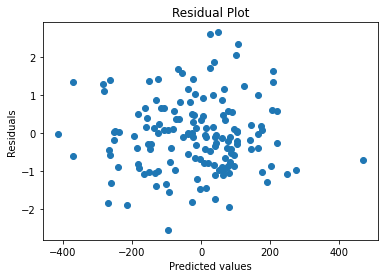

In [7]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

### Part 1

1. Try different number of hidden layers, number of neurons and changing the activation function
2. Plot the residual, training and testing.
3. Report your findings

## Neural Networks 
#### On a Regression Problem

In [8]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

2023-05-09 11:20:27.572047: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

In [11]:

model = Sequential()
model.add(Dense(32, activation='leaky_relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), epochs=100,
                    batch_size=32, verbose=0)

In [12]:
mse_train = model.evaluate(X_train, y_train, verbose=0)
mse_test = model.evaluate(X_test, y_test, verbose=0)
print("Training Mean Squared Error: ", mse_train)
print("Testing Mean Squared Error: ", mse_test)

Training Mean Squared Error:  25.06949806213379
Testing Mean Squared Error:  41.78527069091797


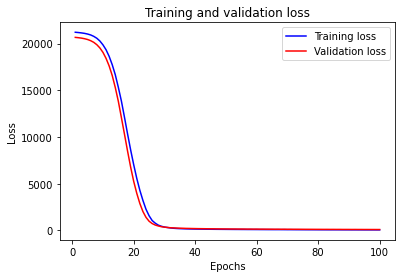

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss',color='red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

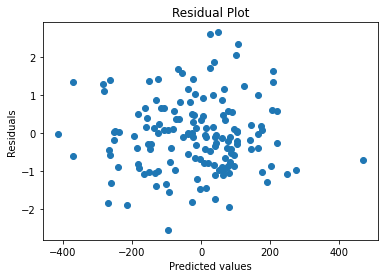

In [13]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

### Report 

 I am working with a feed forward Neural Network model. I decided to use 3 hidden layers and an output.

The activation function used in this model is Leaky Relu which per research it is better as compared to Relu since,
it increase the range of the relu function (doesn't make all negative values 0).   

For the 3 hidden layers i used 2 unique neurons. The first layer has 32 neurons and the input shape is determined by the number of features in the input data. The other 2 layers has 16 neurons.
The final layer has 1 neuron, and for a regreesion problem it is appropriate for the output layer to have 1 output.


The model is compiled with the Adam optimiser and mean squared error (MSE) loss function.
During training, the model is fit to the training data for 100 epochs, with a batch size of 32. The validation data is also provided, which allows for monitoring of the model's performance on unseen data during training.


The training MSE is 25.069 and the testing MSE is 41.785.
The MSE measures the average squared difference between the predicted and actual values of the target variable. A lower MSE indicates better performance of the model.

The results suggest that the model is performing better on the training data compared to the testing data, which could indicate some degree of overfitting.

The training loss measures how well the model is performing on the training data during training.
The validation loss measures how well the model is performing on data that it has not seen during training.

From the Training and Validation Loss graph it is clear that the training loss and validation loss  both decrease and converge to a low value. This clearly states that the model is not overfitting.


The residual plot shows the residual between the predicted and actual values to visualize the errors in our model. For a good model the residuals should be randomly scattered around zero.


## NN Classification Problems

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [27]:
iris = load_iris()
X = iris.data
y = iris.target

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = to_categorical(y)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [31]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=1000, batch_size=32)

Epoch 1/1000
4/4 [==============================] - 2s 94ms/step - loss: 1.1288 - accuracy: 0.3524 - val_loss: 1.1510 - val_accuracy: 0.2889
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.1130 - accuracy: 0.3524 - val_loss: 1.1339 - val_accuracy: 0.2889
Epoch 3/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.0998 - accuracy: 0.3524 - val_loss: 1.1202 - val_accuracy: 0.2889
Epoch 4/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.0936 - accuracy: 0.3524 - val_loss: 1.1095 - val_accuracy: 0.2889
Epoch 5/1000
4/4 [==============================] - 0s 15ms/step - loss: 1.0927 - accuracy: 0.3524 - val_loss: 1.1014 - val_accuracy: 0.2889
Epoch 6/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.0880 - accuracy: 0.3524 - val_loss: 1.0979 - val_accuracy: 0.2889
Epoch 7/1000
4/4 [==============================] - 0s 14ms/step - loss: 1.0854 - accuracy: 0.3524 - val_loss: 1.0965 - val_accuracy: 0.3111
Epoch 8/1000


Epoch 59/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5524 - accuracy: 0.8667 - val_loss: 0.4879 - val_accuracy: 0.8222
Epoch 60/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5448 - accuracy: 0.8667 - val_loss: 0.4812 - val_accuracy: 0.8222
Epoch 61/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5374 - accuracy: 0.8762 - val_loss: 0.4742 - val_accuracy: 0.8444
Epoch 62/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.5303 - accuracy: 0.8762 - val_loss: 0.4675 - val_accuracy: 0.8667
Epoch 63/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.5231 - accuracy: 0.8857 - val_loss: 0.4605 - val_accuracy: 0.9111
Epoch 64/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.5165 - accuracy: 0.9048 - val_loss: 0.4538 - val_accuracy: 0.9111
Epoch 65/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.5102 - accuracy: 0.9048 - val_loss: 0.4472 - val_accuracy: 0.9333
Epoch 

4/4 [==============================] - 0s 14ms/step - loss: 0.2576 - accuracy: 0.9524 - val_loss: 0.2122 - val_accuracy: 0.9556
Epoch 117/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2537 - accuracy: 0.9524 - val_loss: 0.2091 - val_accuracy: 0.9556
Epoch 118/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2502 - accuracy: 0.9524 - val_loss: 0.2052 - val_accuracy: 0.9556
Epoch 119/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.2471 - accuracy: 0.9524 - val_loss: 0.2018 - val_accuracy: 0.9778
Epoch 120/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2433 - accuracy: 0.9524 - val_loss: 0.1981 - val_accuracy: 0.9778
Epoch 121/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2403 - accuracy: 0.9619 - val_loss: 0.1937 - val_accuracy: 0.9778
Epoch 122/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2372 - accuracy: 0.9619 - val_loss: 0.1901 - val_accuracy: 0.9778
Epoch 123/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.1314 - accuracy: 0.9619 - val_loss: 0.0962 - val_accuracy: 0.9778
Epoch 174/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1309 - accuracy: 0.9619 - val_loss: 0.0940 - val_accuracy: 0.9778
Epoch 175/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1292 - accuracy: 0.9619 - val_loss: 0.0930 - val_accuracy: 0.9778
Epoch 176/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1278 - accuracy: 0.9619 - val_loss: 0.0913 - val_accuracy: 0.9778
Epoch 177/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1271 - accuracy: 0.9619 - val_loss: 0.0901 - val_accuracy: 0.9778
Epoch 178/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1261 - accuracy: 0.9619 - val_loss: 0.0891 - val_accuracy: 0.9778
Epoch 179/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1255 - accuracy: 0.9619 - val_loss: 0.0881 - val_accuracy: 0.9778
Epoch 180/1000

4/4 [==============================] - 0s 18ms/step - loss: 0.0930 - accuracy: 0.9619 - val_loss: 0.0569 - val_accuracy: 0.9778
Epoch 231/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0924 - accuracy: 0.9619 - val_loss: 0.0561 - val_accuracy: 1.0000
Epoch 232/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0916 - accuracy: 0.9714 - val_loss: 0.0557 - val_accuracy: 1.0000
Epoch 233/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0922 - accuracy: 0.9619 - val_loss: 0.0561 - val_accuracy: 0.9778
Epoch 234/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0921 - accuracy: 0.9619 - val_loss: 0.0568 - val_accuracy: 0.9778
Epoch 235/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0911 - accuracy: 0.9619 - val_loss: 0.0563 - val_accuracy: 0.9778
Epoch 236/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0905 - accuracy: 0.9619 - val_loss: 0.0556 - val_accuracy: 0.9778
Epoch 237/1000

4/4 [==============================] - 0s 26ms/step - loss: 0.0790 - accuracy: 0.9619 - val_loss: 0.0437 - val_accuracy: 0.9778
Epoch 288/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0786 - accuracy: 0.9619 - val_loss: 0.0425 - val_accuracy: 0.9778
Epoch 289/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0775 - accuracy: 0.9619 - val_loss: 0.0415 - val_accuracy: 1.0000
Epoch 290/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0770 - accuracy: 0.9714 - val_loss: 0.0405 - val_accuracy: 1.0000
Epoch 291/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0773 - accuracy: 0.9810 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 292/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0766 - accuracy: 0.9810 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 293/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0761 - accuracy: 0.9810 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 294/1000

4/4 [==============================] - 0s 11ms/step - loss: 0.0713 - accuracy: 0.9714 - val_loss: 0.0326 - val_accuracy: 1.0000
Epoch 345/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0703 - accuracy: 0.9714 - val_loss: 0.0321 - val_accuracy: 1.0000
Epoch 346/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0691 - accuracy: 0.9810 - val_loss: 0.0311 - val_accuracy: 1.0000
Epoch 347/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0730 - accuracy: 0.9810 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 348/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0723 - accuracy: 0.9810 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 349/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0722 - accuracy: 0.9810 - val_loss: 0.0310 - val_accuracy: 1.0000
Epoch 350/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0707 - accuracy: 0.9810 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 351/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.0688 - accuracy: 0.9810 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 402/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0676 - accuracy: 0.9810 - val_loss: 0.0239 - val_accuracy: 1.0000
Epoch 403/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0655 - accuracy: 0.9810 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 404/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0658 - accuracy: 0.9810 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 405/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0652 - accuracy: 0.9810 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 406/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.0651 - accuracy: 0.9810 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 407/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0647 - accuracy: 0.9810 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 408/1000

4/4 [==============================] - 0s 21ms/step - loss: 0.0623 - accuracy: 0.9810 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 459/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0654 - accuracy: 0.9810 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 460/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0638 - accuracy: 0.9810 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 461/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0632 - accuracy: 0.9810 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 462/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0624 - accuracy: 0.9810 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 463/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0626 - accuracy: 0.9810 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 464/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0628 - accuracy: 0.9810 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 465/1000

4/4 [==============================] - 0s 19ms/step - loss: 0.0609 - accuracy: 0.9810 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 516/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0604 - accuracy: 0.9810 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 517/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0619 - accuracy: 0.9810 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 518/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0607 - accuracy: 0.9810 - val_loss: 0.0180 - val_accuracy: 1.0000
Epoch 519/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.0612 - accuracy: 0.9810 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 520/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0604 - accuracy: 0.9810 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 521/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0604 - accuracy: 0.9810 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 522/1000

4/4 [==============================] - 0s 39ms/step - loss: 0.0606 - accuracy: 0.9810 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 573/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.0595 - accuracy: 0.9810 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 574/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0587 - accuracy: 0.9810 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 575/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0598 - accuracy: 0.9810 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 576/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0600 - accuracy: 0.9810 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 577/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0598 - accuracy: 0.9810 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 578/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0636 - accuracy: 0.9810 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 579/1000

4/4 [==============================] - 0s 25ms/step - loss: 0.0589 - accuracy: 0.9810 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 630/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0588 - accuracy: 0.9810 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 631/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0586 - accuracy: 0.9810 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 632/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0598 - accuracy: 0.9810 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 633/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0590 - accuracy: 0.9810 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 634/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0583 - accuracy: 0.9810 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 635/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0583 - accuracy: 0.9810 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 636/1000

4/4 [==============================] - 0s 26ms/step - loss: 0.0581 - accuracy: 0.9810 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 687/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0590 - accuracy: 0.9810 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 688/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0578 - accuracy: 0.9810 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 689/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0581 - accuracy: 0.9810 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 690/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0586 - accuracy: 0.9810 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 691/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0580 - accuracy: 0.9810 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 692/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0577 - accuracy: 0.9810 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 693/1000

4/4 [==============================] - 0s 22ms/step - loss: 0.0582 - accuracy: 0.9810 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 744/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.0577 - accuracy: 0.9810 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 745/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.0571 - accuracy: 0.9810 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 746/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0578 - accuracy: 0.9810 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 747/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0571 - accuracy: 0.9810 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 748/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.0587 - accuracy: 0.9810 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 749/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0577 - accuracy: 0.9810 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 750/1000

4/4 [==============================] - 0s 27ms/step - loss: 0.0571 - accuracy: 0.9810 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 801/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.0568 - accuracy: 0.9810 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 802/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.0575 - accuracy: 0.9810 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 803/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.0573 - accuracy: 0.9810 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 804/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.0566 - accuracy: 0.9810 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 805/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0576 - accuracy: 0.9810 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 806/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0583 - accuracy: 0.9810 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 807/1000

4/4 [==============================] - 0s 26ms/step - loss: 0.0570 - accuracy: 0.9810 - val_loss: 0.0131 - val_accuracy: 1.0000
Epoch 858/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0564 - accuracy: 0.9810 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 859/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0561 - accuracy: 0.9810 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 860/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0557 - accuracy: 0.9810 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 861/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0582 - accuracy: 0.9810 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 862/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.0591 - accuracy: 0.9810 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 863/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0573 - accuracy: 0.9810 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 864/1000

4/4 [==============================] - 0s 27ms/step - loss: 0.0559 - accuracy: 0.9810 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 915/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0561 - accuracy: 0.9810 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 916/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0562 - accuracy: 0.9810 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 917/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0559 - accuracy: 0.9810 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 918/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0561 - accuracy: 0.9810 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 919/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0562 - accuracy: 0.9810 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 920/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0563 - accuracy: 0.9810 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 921/1000

4/4 [==============================] - 0s 26ms/step - loss: 0.0559 - accuracy: 0.9810 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 972/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0558 - accuracy: 0.9810 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 973/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0548 - accuracy: 0.9810 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 974/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0571 - accuracy: 0.9810 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 975/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.0577 - accuracy: 0.9810 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 976/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0583 - accuracy: 0.9810 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 977/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0569 - accuracy: 0.9810 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 978/1000

2/2 [==============================] - 1s 4ms/step


Text(33.0, 0.5, 'True labels')

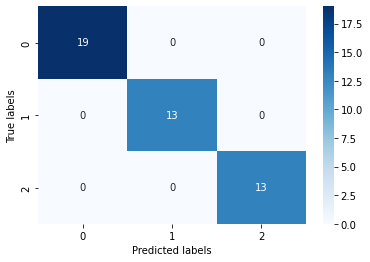

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

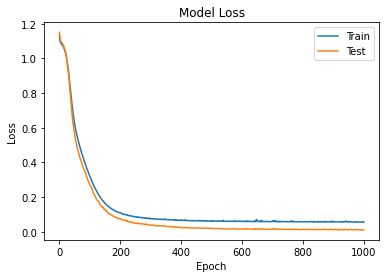

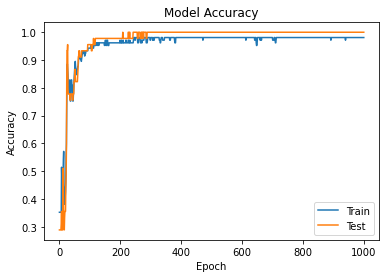

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Report

 I am working with a feed forward Neural Network model.This is a multi classclassification Neural Network model.   
 The model architecture consists of four layers with only sigmoid activation functions in the first three layers and a softmax activation function in the output layer.  
 
 The training results show that the model achieved an accuracy of 98.1% on the training data and an accuracy of 100% on the testing data, indicating that the model performed well on the given dataset. The loss values for both training and testing data decreased as the number of epochs increased, indicating that the model improved over time